In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import cartopy.crs as ccrs                   # import projections
import cartopy
import gsw
# import cftime

In [2]:
%matplotlib inline  
plt.rcParams['figure.figsize'] = (5,4)
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 400
plt.close('all')

__figdir__ = '../plots/' + 'ErsenS'
savefig_args = {'bbox_inches':'tight', 'pad_inches':0.2}
plotfiletype='png'

# define savefig if we want to use if savefig 
savefig = 1


In [3]:
#specify the grid
xmin, xmax = (-126,-121)
ymin, ymax = (36.25,38.5)

In [4]:
#file = '/Users/lfp/Documents/GitHub/satellite_python_2022V2/Data/dt_global_allsat_phy_l4_20190909_20210726.nc'
file = '../Data/dt_global_allsat_phy_l4_20190909_20210726.nc'

In [5]:
ds = xr.open_dataset(file)

In [10]:
ds

<xarray.Dataset>
Dimensions:         (time: 1, latitude: 720, nv: 2, longitude: 1440)
Coordinates:
  * time            (time) datetime64[ns] 2019-09-09
  * latitude        (latitude) float32 -89.88 -89.62 -89.38 ... 89.62 89.88
  * longitude       (longitude) float32 -179.9 -179.6 -179.4 ... 179.6 179.9
  * nv              (nv) int32 0 1
Data variables: (12/14)
    crs             int32 -2147483647
    lat_bnds        (latitude, nv) float32 -90.0 -89.75 -89.75 ... 89.75 90.0
    lon_bnds        (longitude, nv) float32 -180.0 -179.8 -179.8 ... 179.8 180.0
    sla             (time, latitude, longitude) float64 ...
    err_sla         (time, latitude, longitude) float64 ...
    ugosa           (time, latitude, longitude) float64 ...
    ...              ...
    err_vgosa       (time, latitude, longitude) float64 ...
    adt             (time, latitude, longitude) float64 ...
    ugos            (time, latitude, longitude) float64 ...
    vgos            (time, latitude, longitude) float64 ...
    flag_ice        (time, latitude, longitude) float64 ...
    tpa_correction  (time) float64 0.0
Attributes: (12/44)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    summary:                         SSALTO/DUACS Delayed-Time Level-4 sea su...
    time_coverage_duration:          P1D
    time_coverage_end:               2019-09-09T12:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2019-09-08T12:00:00Z
    title:                           DT merged all satellites Global Ocean Gr...

In [11]:
ds.latitude

<xarray.DataArray 'latitude' (latitude: 720)>
array([-89.875, -89.625, -89.375, ...,  89.375,  89.625,  89.875],
      dtype=float32)
Coordinates:
  * latitude  (latitude) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
Attributes:
    axis:           Y
    bounds:         lat_bnds
    long_name:      Latitude
    standard_name:  latitude
    units:          degrees_north
    valid_max:      89.875
    valid_min:      -89.875

In [12]:
sla = ds.sla

/var/folders/x9/37hmb2cj4j72s26nwv19n_xh0000gn/T/ipykernel_54790/3451524626.py:22: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(cs,fraction = 0.022, extend='both')


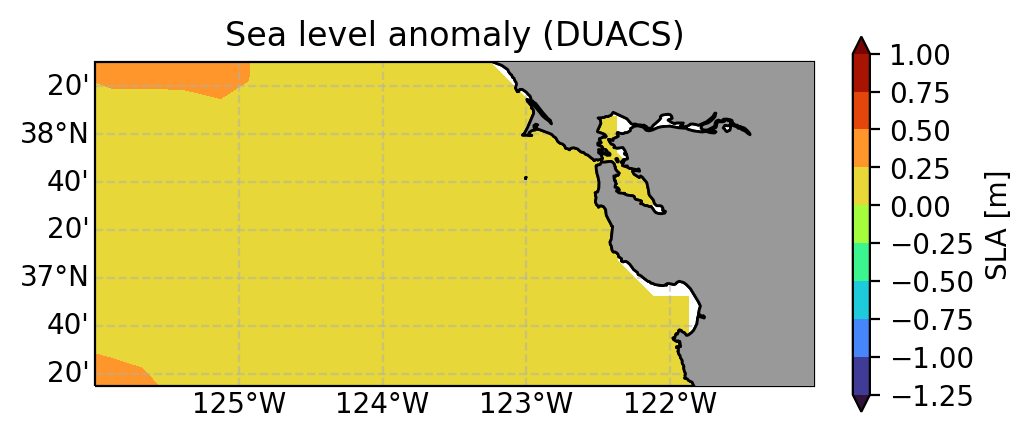

In [13]:
fig = plt.figure()
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=200))  # Orthographic

#set the size of the axis 
extent = [xmin, xmax, ymin, ymax]
ax.set_extent(extent, crs=ccrs.PlateCarree())
ax.set_title('Sea level anomaly (DUACS)')

#plt.set_cmap(cmap=plt.get_cmap('nipy_spectral'))
plt.set_cmap(cmap=plt.get_cmap('turbo'))
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.ylabels_right = False
#gl.xlocator = matplotlib.ticker.MaxNLocator(10)
#gl.xlocator = matplotlib.ticker.AutoLocator
# gl.xlocator = matplotlib.ticker.FixedLocator(np.arange(0, 360 ,30))

levels = 10
cs = ax.contourf(ds.longitude,ds.latitude,np.squeeze(sla), levels, extend='both', transform=ccrs.PlateCarree())
# cs = ax.pcolormesh(ds.longitude,ds.latitude,np.squeeze(ds.sla), vmin=levels[0], vmax=levels[-1], transform=ccrs.PlateCarree())
# cb = plt.colorbar(cs,ax=ax,shrink=.8,pad=.05)
cb = plt.colorbar(cs,fraction = 0.022, extend='both')
cb.set_label('SLA [m]',fontsize = 10)
ax.coastlines()
ax.add_feature(cartopy.feature.LAND, zorder=3, facecolor=[.6,.6,.6], edgecolor='black')

#plot_ops_area(ax,transform=ccrs.PlateCarree(),color='w')


if savefig:
    plt.savefig(__figdir__+'SLA'+plotfiletype,**savefig_args)

# Add a 10 km scale bar